General notes:
- Data source: https://physionet.org/content/mitdb/1.0.0/
- Docu: https://wfdb.readthedocs.io/en/latest/index.html

In [123]:
#%matplotlib notebook
#%matplotlib qt5

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
plt.rcParams['figure.figsize'] = [16, 8]


import numpy as np
import wfdb

# First look

In [4]:
record = wfdb.rdrecord('data/MIT_BIH_Arrhythmia_Database/100')
annotation = wfdb.rdann('data/MIT_BIH_Arrhythmia_Database/100', 'atr')

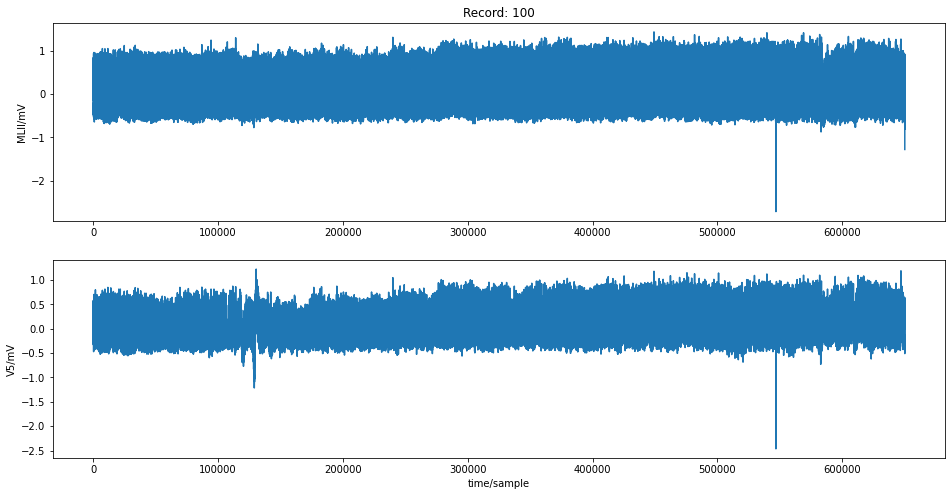

In [5]:
wfdb.plot_wfdb(record=record) 

In [7]:
record.__dict__

{'record_name': '100',
 'n_sig': 2,
 'fs': 360,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 650000,
 'base_time': None,
 'base_date': None,
 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal'],
 'sig_name': ['MLII', 'V5'],
 'p_signal': array([[-0.145, -0.065],
        [-0.145, -0.065],
        [-0.145, -0.065],
        ...,
        [-0.675, -0.365],
        [-0.765, -0.335],
        [-1.28 ,  0.   ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['100.dat', '100.dat'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [200.0, 200.0],
 'baseline': [1024, 1024],
 'units': ['mV', 'mV'],
 'adc_res': [11, 11],
 'adc_zero': [1024, 1024],
 'init_value': [995, 1011],
 'checksum': [-22131, 20052],
 'block_size': [0, 0]}

In [8]:
annotation.__dict__

{'record_name': '100',
 'extension': 'atr',
 'sample': array([    18,     77,    370, ..., 649484, 649734, 649991]),
 'symbol': ['+',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'A',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N'

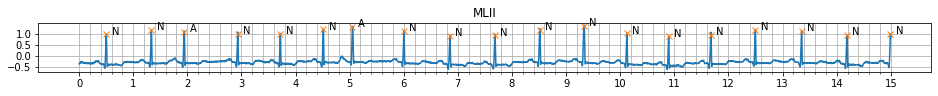

In [10]:
record = wfdb.rdrecord('data/MIT_BIH_Arrhythmia_Database/100')
annotation = wfdb.rdann('data/MIT_BIH_Arrhythmia_Database/100', 'atr')

#t0 = int(0.2 * record.sig_len)  # select timepoint by ratio of time passed

# points of interest, 
# see file:///home/arne/Code/functional_data_hmm/data/MIT_BIH_Arrhythmia_Database/mitdbdir/records.htm
#t0 = (25*60 + 17) * record.fs  # Premature ventricular contraction
t0 = (26*60 + 11) * record.fs  # Atrial premature beat
dt = 15  # in seconds

channel = 0

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
t = np.arange(0, dt, 1/record.fs)
sig = record.p_signal[t0:t0+dt*record.fs, channel]
ax.plot(t, sig)

annotation_mask = np.logical_and(annotation.sample >= t0, annotation.sample < t0+dt*record.fs)
annotation_sub = annotation.sample[annotation_mask]
symbols_sub = np.asarray(annotation.symbol, dtype=object)[annotation_mask]
annotation_t = (annotation_sub - t0) / record.fs
ax.plot(annotation_t, record.p_signal[annotation_sub, channel], 'x')
for i, symbol in enumerate(symbols_sub):
    ax.annotate(symbol, (annotation_t[i]+0.1, record.p_signal[annotation_sub[i], channel]))

plt.title(record.sig_name[channel])
ax.set_xticks(np.arange(0, dt+0.1, 1))
ax.set_xticks(np.arange(0, dt+0.1, 0.2), minor=True)
ax.set_yticks([])
ax.set_yticks(np.arange(np.ceil(min(sig))-0.5, max(sig), 0.5))
ax.grid(which='both')
ax.set_box_aspect((max(sig)-min(sig))/dt * 0.2/0.5)
pass

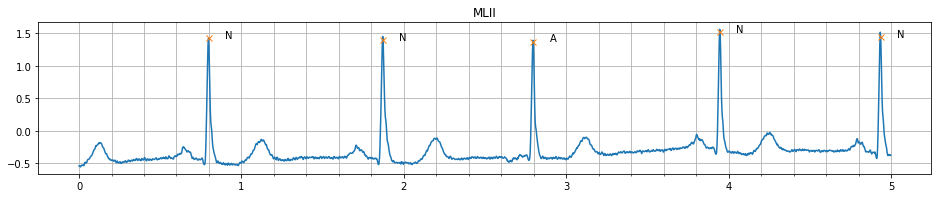

In [85]:
record = wfdb.rdrecord('data/MIT_BIH_Arrhythmia_Database/101')
annotation = wfdb.rdann('data/MIT_BIH_Arrhythmia_Database/101', 'atr')

t0 = int(0.2 * record.sig_len)  # select timepoint by ratio of time passed

# points of interest, 
# see file:///home/arne/Code/functional_data_hmm/data/MIT_BIH_Arrhythmia_Database/mitdbdir/records.htm
t0 = (1*60 + 51) * record.fs  # Noise
#t0 = (5*60 + 15) * record.fs  # Artifact?
t0 = (9*60 + 56) * record.fs  # Atrial premature beat

dt = 5  # in seconds

channel = 0

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
t = np.arange(0, dt, 1/record.fs)
sig = record.p_signal[t0:t0+dt*record.fs, channel]
ax.plot(t, sig)

annotation_mask = np.logical_and(annotation.sample >= t0, annotation.sample < t0+dt*record.fs)
annotation_sub = annotation.sample[annotation_mask]
symbols_sub = np.asarray(annotation.symbol, dtype=object)[annotation_mask]
annotation_t = (annotation_sub - t0) / record.fs
ax.plot(annotation_t, record.p_signal[annotation_sub, channel], 'x')
for i, symbol in enumerate(symbols_sub):
    ax.annotate(symbol, (annotation_t[i]+0.1, record.p_signal[annotation_sub[i], channel]))

plt.title(record.sig_name[channel])
ax.set_xticks(np.arange(0, dt+0.1, 1))
ax.set_xticks(np.arange(0, dt+0.1, 0.2), minor=True)
ax.set_yticks([])
ax.set_yticks(np.arange(np.ceil(min(sig))-0.5, max(sig), 0.5))
ax.grid(which='both')
ax.set_box_aspect((max(sig)-min(sig))/dt * 0.2/0.5)
pass

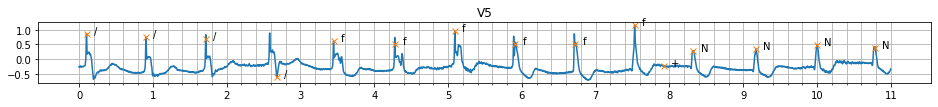

In [89]:
record = wfdb.rdrecord('data/MIT_BIH_Arrhythmia_Database/102')
annotation = wfdb.rdann('data/MIT_BIH_Arrhythmia_Database/102', 'atr')

t0 = int(0.2 * record.sig_len)  # select timepoint by ratio of time passed

# points of interest, 
# see file:///home/arne/Code/functional_data_hmm/data/MIT_BIH_Arrhythmia_Database/mitdbdir/records.htm
t0 = (1*60 + 13) * record.fs  # Transition from paced to normal sinus rhythm

dt = 11  # in seconds

channel = 0

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
t = np.arange(0, dt, 1/record.fs)
sig = record.p_signal[t0:t0+dt*record.fs, channel]
ax.plot(t, sig)

annotation_mask = np.logical_and(annotation.sample >= t0, annotation.sample < t0+dt*record.fs)
annotation_sub = annotation.sample[annotation_mask]
symbols_sub = np.asarray(annotation.symbol, dtype=object)[annotation_mask]
annotation_t = (annotation_sub - t0) / record.fs
ax.plot(annotation_t, record.p_signal[annotation_sub, channel], 'x')
for i, symbol in enumerate(symbols_sub):
    ax.annotate(symbol, (annotation_t[i]+0.1, record.p_signal[annotation_sub[i], channel]))

plt.title(record.sig_name[channel])
ax.set_xticks(np.arange(0, dt+0.1, 1))
ax.set_xticks(np.arange(0, dt+0.1, 0.2), minor=True)
ax.set_yticks([])
ax.set_yticks(np.arange(np.ceil(min(sig))-0.5, max(sig), 0.5))
ax.grid(which='both')
ax.set_box_aspect((max(sig)-min(sig))/dt * 0.2/0.5)
pass

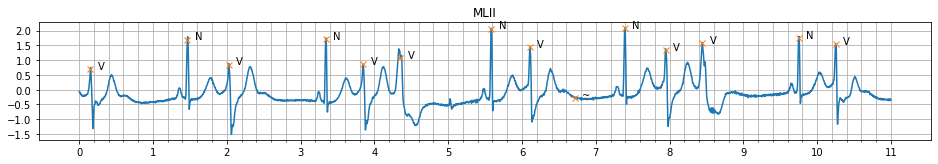

In [99]:
record = wfdb.rdrecord('data/MIT_BIH_Arrhythmia_Database/106')
annotation = wfdb.rdann('data/MIT_BIH_Arrhythmia_Database/106', 'atr')

t0 = int(0.2 * record.sig_len)  # select timepoint by ratio of time passed

# points of interest, 
# see file:///home/arne/Code/functional_data_hmm/data/MIT_BIH_Arrhythmia_Database/mitdbdir/records.htm
t0 = (0*60 + 19) * record.fs  #0:19 Normal sinus rhythm, noise in lower signal
t0 = (1*60 + 37) * record.fs  #1:37 Ventricular couplets
t0 = (2*60 + 53) * record.fs  #2:53 Ventricular tachycardia, 3 beats
t0 = (4*60 + 23) * record.fs  #4:23 PVC
t0 = (12*60 + 27) * record.fs  #12:27 Ventricular bigeminy (two types)
t0 = (16*60 + 17) * record.fs  #16:17 Multiform PVCs, ventricular couplet
t0 = (25*60 + 13) * record.fs  #25:13 Ventricular couplet
t0 = (25*60 + 52) * record.fs  #25:52 Ventricular couplets

dt = 11  # in seconds

channel = 0

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
t = np.arange(0, dt, 1/record.fs)
sig = record.p_signal[t0:t0+dt*record.fs, channel]
ax.plot(t, sig)

annotation_mask = np.logical_and(annotation.sample >= t0, annotation.sample < t0+dt*record.fs)
annotation_sub = annotation.sample[annotation_mask]
symbols_sub = np.asarray(annotation.symbol, dtype=object)[annotation_mask]
annotation_t = (annotation_sub - t0) / record.fs
ax.plot(annotation_t, record.p_signal[annotation_sub, channel], 'x')
for i, symbol in enumerate(symbols_sub):
    ax.annotate(symbol, (annotation_t[i]+0.1, record.p_signal[annotation_sub[i], channel]))

plt.title(record.sig_name[channel])
ax.set_xticks(np.arange(0, dt+0.1, 1))
ax.set_xticks(np.arange(0, dt+0.1, 0.2), minor=True)
ax.set_yticks([])
ax.set_yticks(np.arange(np.ceil(min(sig))-0.5, max(sig), 0.5))
ax.grid(which='both')
ax.set_box_aspect((max(sig)-min(sig))/dt * 0.2/0.5)
pass

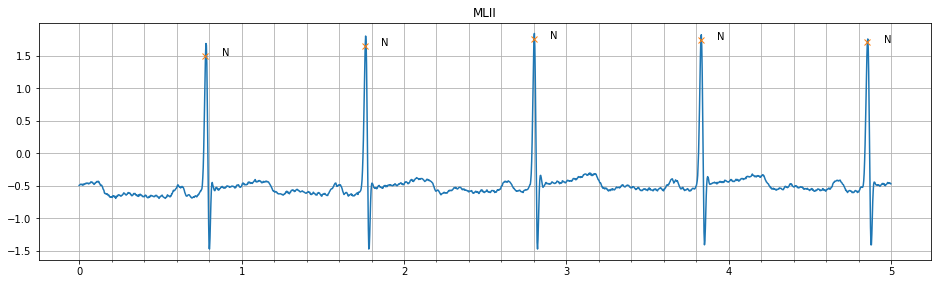

In [36]:
# 115: record with normal beats only (like 122)
record = wfdb.rdrecord('data/MIT_BIH_Arrhythmia_Database/115')
annotation = wfdb.rdann('data/MIT_BIH_Arrhythmia_Database/115', 'atr')

t0 = int(0.2 * record.sig_len)  # select timepoint by ratio of time passed

# points of interest, 
# see file:///home/arne/Code/functional_data_hmm/data/MIT_BIH_Arrhythmia_Database/mitdbdir/records.htm
t0 = (3*60 + 16) * record.fs  #3:22 Sinus arrhythmia ?

dt = 5  # in seconds

channel = 0

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
t = np.arange(0, dt, 1/record.fs)
sig = record.p_signal[t0:t0+dt*record.fs, channel]
ax.plot(t, sig)

annotation_mask = np.logical_and(annotation.sample >= t0, annotation.sample < t0+dt*record.fs)
annotation_sub = annotation.sample[annotation_mask]
symbols_sub = np.asarray(annotation.symbol, dtype=object)[annotation_mask]
annotation_t = (annotation_sub - t0) / record.fs
ax.plot(annotation_t, record.p_signal[annotation_sub, channel], 'x')
for i, symbol in enumerate(symbols_sub):
    ax.annotate(symbol, (annotation_t[i]+0.1, record.p_signal[annotation_sub[i], channel]))

plt.title(record.sig_name[channel])
ax.set_xticks(np.arange(0, dt+0.1, 1))
ax.set_xticks(np.arange(0, dt+0.1, 0.2), minor=True)
ax.set_yticks([])
ax.set_yticks(np.arange(np.ceil(min(sig))-0.5, max(sig), 0.5))
ax.grid(which='both')
ax.set_box_aspect((max(sig)-min(sig))/dt * 0.2/0.5)
pass

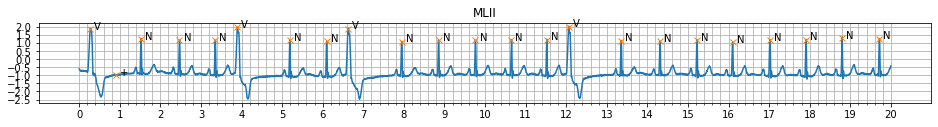

In [109]:
# two types of beats, 1543 normal and 444 PVC
record = wfdb.rdrecord('data/MIT_BIH_Arrhythmia_Database/119')
annotation = wfdb.rdann('data/MIT_BIH_Arrhythmia_Database/119', 'atr')

t0 = int(0.2 * record.sig_len)  # select timepoint by ratio of time passed

# points of interest, 
# see file:///home/arne/Code/functional_data_hmm/data/MIT_BIH_Arrhythmia_Database/mitdbdir/records.htm
t0 = (1*60 + 75) * record.fs  #1:55 PVC

dt = 20  # in seconds

channel = 0

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
t = np.arange(0, dt, 1/record.fs)
sig = record.p_signal[t0:t0+dt*record.fs, channel]
ax.plot(t, sig)

annotation_mask = np.logical_and(annotation.sample >= t0, annotation.sample < t0+dt*record.fs)
annotation_sub = annotation.sample[annotation_mask]
symbols_sub = np.asarray(annotation.symbol, dtype=object)[annotation_mask]
annotation_t = (annotation_sub - t0) / record.fs
ax.plot(annotation_t, record.p_signal[annotation_sub, channel], 'x')
for i, symbol in enumerate(symbols_sub):
    ax.annotate(symbol, (annotation_t[i]+0.1, record.p_signal[annotation_sub[i], channel]))

plt.title(record.sig_name[channel])
ax.set_xticks(np.arange(0, dt+0.1, 1))
ax.set_xticks(np.arange(0, dt+0.1, 0.2), minor=True)
ax.set_yticks([])
ax.set_yticks(np.arange(np.ceil(min(sig))-0.5, max(sig), 0.5))
ax.grid(which='both')
ax.set_box_aspect((max(sig)-min(sig))/dt * 0.2/0.5)
pass

Christoph fragen:
- Ganz allgemein: Was sind die wichtigen points of interest wo du zuerst drauf guckst?
- Spiel außer der Form eigentlich sowas wie amplitude und y-Verschiebung und Trend/Drift oder wie das heißt eine Rolle?
- - Antwort: y-Verschiebung spielt keine Rolle, amplitude evtl schon
- Wie zerschneided man die am besten, was ist eine Einheit? Am einfachsten wäre R bis R, aber wahrscheinlich würde es mehr Sinn machen zwischen T und P zu trennen und dann R zu allignen? Erstens weil Menschen so über das Ding nachdenken, zweitens weil man dann nicht den Teil mit der meisten Struktur (QRS) am Rand des Intervals hat, das ist für functional data analysis schlecht. Wie ist es denn wenn man von einem Rythmus in den Anderen wechselt, kann das an einer beliebigen Stelle passieren oder ist das zB tendenziell immer zwischen T und P?
- - Die Semantisch logische Einheit wäre von P bis T, also zwischen T und P trennen, das wird aber schwierig automatisiert
- MLII: modified limb lead II? Ist das "Lead II is the voltage between the (positive) left leg (LL) electrode and the right arm (RA) electrode" (Wiki)?
- - Ja


# Cut the data into beats

In [97]:
#record_nr = 115
#record_nr = 122
record_nr = 119
record = wfdb.rdrecord('data/MIT_BIH_Arrhythmia_Database/{}'.format(record_nr))
annotation = wfdb.rdann('data/MIT_BIH_Arrhythmia_Database/{}'.format(record_nr), 'atr')
symbols = np.asarray(annotation.symbol, dtype=object)
cuts = annotation.sample[np.logical_or(symbols == 'N', symbols == 'V')]
periods = (cuts[1:] - cuts[:-1]) / record.fs
max_data_len = max(cuts[1:] - cuts[:-1])
min_data_len = min(cuts[1:] - cuts[:-1])
print('Nr of curves:', len(cuts) - 1)
print('Longest curve:', max_data_len)
print('Shortest curve:', min_data_len)

Nr of curves: 1986
Longest curve: 530
Shortest curve: 179


In [71]:
set(annotation.symbol) # N: Normal beat

{'+', 'N', '|'}

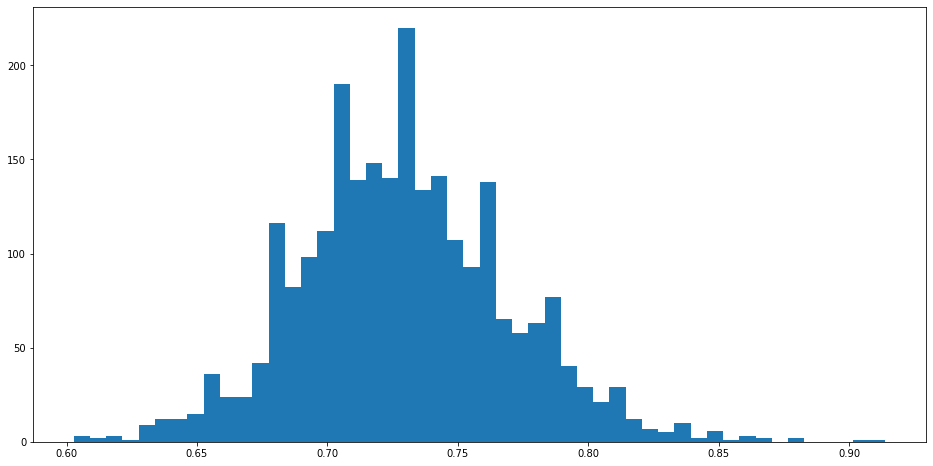

In [72]:
# Distribution of beat leangths
plt.hist(periods, bins=50)
pass

In [98]:
data = np.array([
    np.append(
        record.p_signal[cuts[i]:cuts[i+1], 0], 
        np.repeat(np.nan, max_data_len - (cuts[i+1] - cuts[i]))
    )
    for i in range(len(cuts)-1)
])

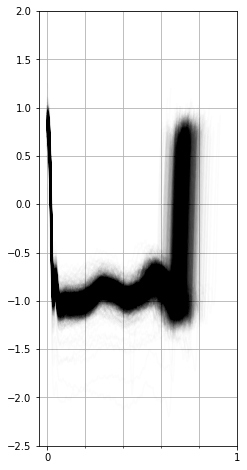

In [74]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

t = np.arange(0, max_data_len) / record.fs
ax.plot(t, data.transpose(), color='black', alpha=0.01)

dt = max_data_len/record.fs
ax.set_xticks(np.arange(0, dt+0.1, 1))
ax.set_xticks(np.arange(0, dt+0.1, 0.2), minor=True)
ax.set_yticks([])
ax.set_yticks(np.arange(-2.5, 2.5, 0.5))
ax.grid(which='both')
ax.set_box_aspect(5/dt * 0.2/0.5)
pass

## Stretch to [0,1] and vertical align

In [99]:
# upsampling might be a bad idea if max_data_len is much longer than the average length of the cluster of shortest
# beats, might create 
data = np.array([
    np.interp(
        np.linspace(0, 1, max_data_len), 
        np.linspace(0, 1, cuts[i+1]-cuts[i]), 
        record.p_signal[cuts[i]:cuts[i+1], 0])
    for i in range(len(cuts)-1)
])

In [100]:
data = (data - data.sum(axis=1)[:, None]/max_data_len)  # vertical align

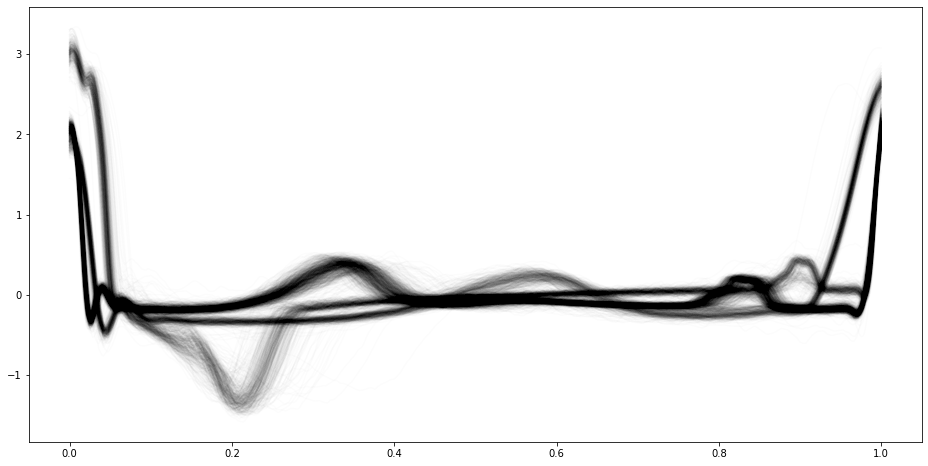

In [101]:
t = np.linspace(0, 1, data.shape[1])
plt.plot(t, data.transpose(), color='black', alpha=0.01)
pass

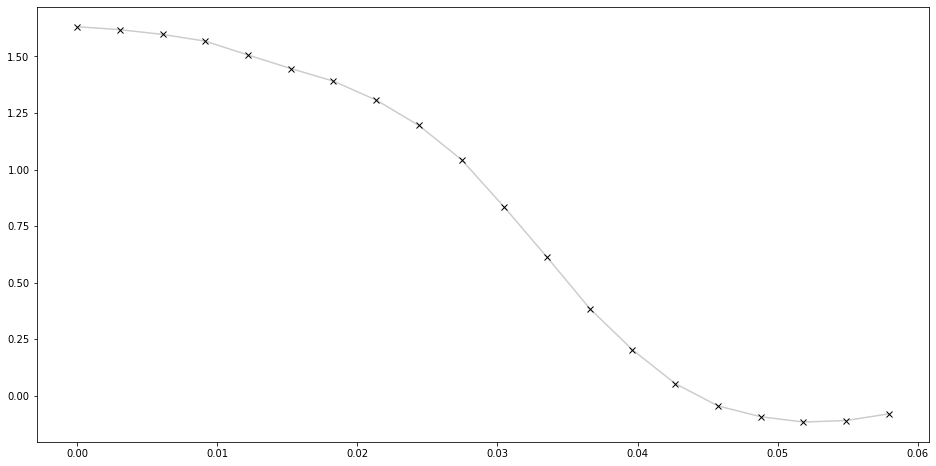

In [78]:
# when the longest and the shortest period are very different (the longest is c times the shortest)
# and we do linear upsampling to the length of the longest, this might results in the shortest curve becoming 
# piecewise linear with pieces of length ceil(c)
t = np.linspace(0, 1, data.shape[1])
plt.plot(t[:20], data[periods.argmin(),:20], color='black', alpha=0.2)
plt.plot(t[:20], data[periods.argmin(),:20], 'x', color='black')
pass

## Summary statistics

In [117]:
mean = data.sum(axis=0) / data.shape[0]
var = ((data - mean)**2).sum(axis=0) / (data.shape[0] - 1)
cov = np.matmul((data - mean).transpose(), data - mean) / (data.shape[0] - 1)
corr = cov / np.sqrt(np.outer(var, var))

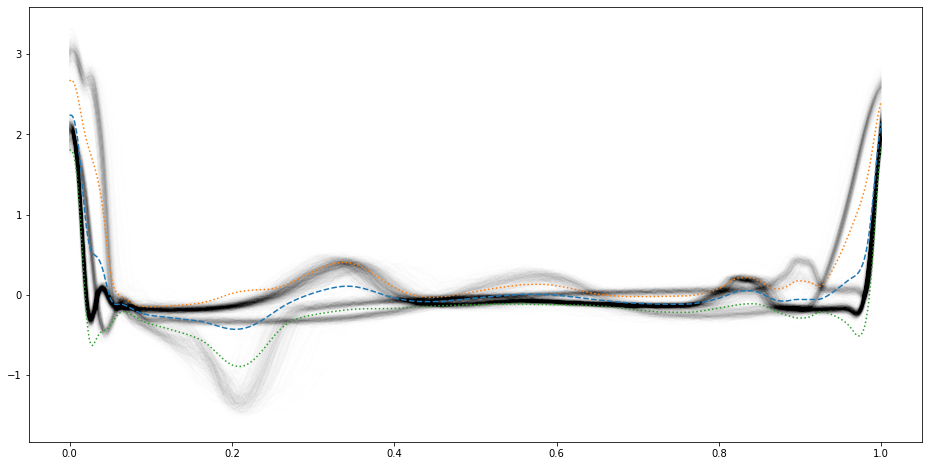

In [103]:
t = np.linspace(0, 1, data.shape[1])
plt.plot(t, data.transpose(), color='black', alpha=0.005)
plt.plot(t, mean, '--')
plt.plot(t, mean+np.sqrt(var), ':')
plt.plot(t, mean-np.sqrt(var), ':')
pass

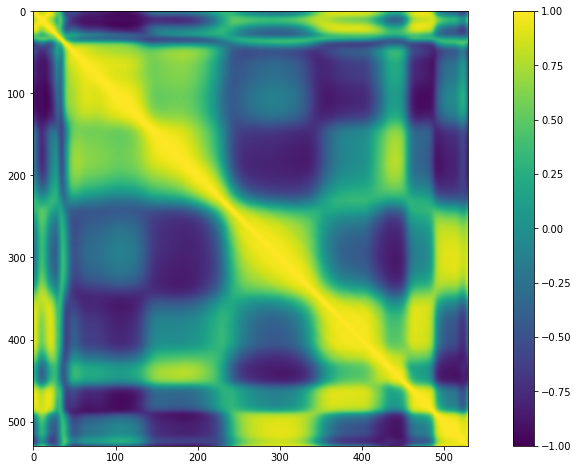

In [124]:
plt.imshow(corr, norm=colors.Normalize(vmin=-1, vmax=1))
plt.colorbar()
pass

# PCA

In [125]:
#record_nr = 115
#record_nr = 122
record_nr = 119

record = wfdb.rdrecord('data/MIT_BIH_Arrhythmia_Database/{}'.format(record_nr))
annotation = wfdb.rdann('data/MIT_BIH_Arrhythmia_Database/{}'.format(record_nr), 'atr')
symbols = np.asarray(annotation.symbol, dtype=object)
cuts = annotation.sample[np.logical_or(symbols == 'N', symbols == 'V')]
data = np.array([
    np.interp(
        np.linspace(0, 1, max_data_len), 
        np.linspace(0, 1, cuts[i+1]-cuts[i]), 
        record.p_signal[cuts[i]:cuts[i+1], 0])
    for i in range(len(cuts)-1)
])
data = (data - data.sum(axis=1)[:, None]/max_data_len)  # vertical align
mean = data.sum(axis=0) / data.shape[0]

In [126]:
x = data - mean

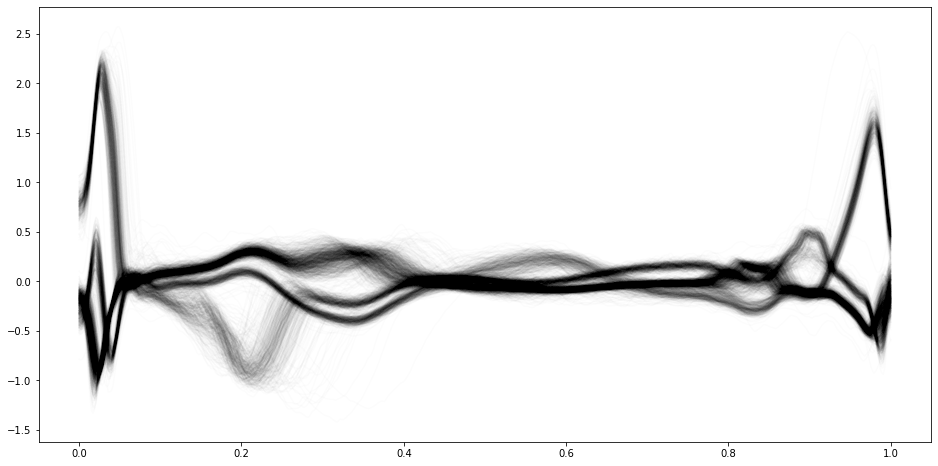

In [128]:
t = np.linspace(0, 1, data.shape[1])
plt.plot(t, x.transpose(), color='black', alpha=0.01)
pass